In [2]:
import numpy as np 
import pandas as pd 

In [3]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [4]:
data.head(3)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,0,NaN,NaN,Coles,1491280P,6.5,1Kg,TEMPE
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,0,NaN,NaN,Coles,1718058P,9.0,1Kg,TEMPE
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,0,NaN,NaN,Coles,2565429P,7.5,1Kg,TEMPE


In [5]:
data.shape

(488640, 16)

In [6]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.00,$3.50 per 1Kg,2kg,0,1,False,8.00,Coles,2263260P,3.50,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.10,$18.00 per 1Kg,approx. 950g,1,1,False,19.00,Coles,3331172P,18.00,1Kg,TEMPE
2,Meat & seafood,Beef & veal,Slow cook & casserole beef,Beef Chuck Casserole Steak,17.10,$18.00 per 1Kg,approx. 950g,1,1,False,19.00,Coles,3331172P,18.00,1Kg,TEMPE
3,Meat & seafood,Lamb,Lamb steak,Lamb Backstrap,9.92,$40.00 per 1Kg,approx. 248g,1,1,False,11.41,Coles,3411442P,40.00,1Kg,TEMPE
4,Meat & seafood,Pork,Pork chops,Pork Loin Chops,12.00,$15.00 per 1Kg,approx. 800g,1,1,False,14.40,Coles,8600850P,15.00,1Kg,TEMPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,Drinks,Energy drinks,Multipack cans,Sugar Free Energy Drink 250mL,15.50,$7.75 per 1L,8 pack,0,1,False,21.00,Red Bull,3324177P,7.75,1L,CANBERRA CIVIC DOORDASH DUMMY
6326,Drinks,Energy drinks,Multipack cans,Ultra Rosa Multipack Cans 4 x 500mL,8.25,$4.13 per 1L,4 pack,0,1,False,13.75,Monster,3990033P,4.13,1L,CANBERRA CIVIC DOORDASH DUMMY
6327,Drinks,Sports drinks,Sports drink,Fierce Grape Sport Drink,2.25,$3.75 per 1L,600mL,0,1,False,3.80,Gatorade,8729937P,3.75,1L,CANBERRA CIVIC DOORDASH DUMMY
6328,Drinks,Sports drinks,Sports drink,Tropical Fruit Sports Drink,2.25,$3.75 per 1L,600mL,0,1,False,3.80,Gatorade,5468917P,3.75,1L,CANBERRA CIVIC DOORDASH DUMMY


In [8]:
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


In [9]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=["unit_price_unit","package_size","Price_per_unit","Brand","Sku","city"])
df=ordenc.fit_transform(df)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df = df.apply(label_encoder.fit_transform)

In [15]:
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,3,17,44,878,103,0,0,0,1,0,168,0,0,207,0,0
1,3,0,4,57,161,1,1,1,1,0,255,0,1,318,0,0


# PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
component_names = [f"Component {i}" for i in range(2)]
pca_data = pd.DataFrame(principal_components, columns=component_names)
pca_data.head(2)

,Component 0,Component 1
0,-422.111316,-286.986117
1,317.954171,-647.746922


In [36]:
pca.explained_variance_ratio_

array([0.46793674, 0.40209352])

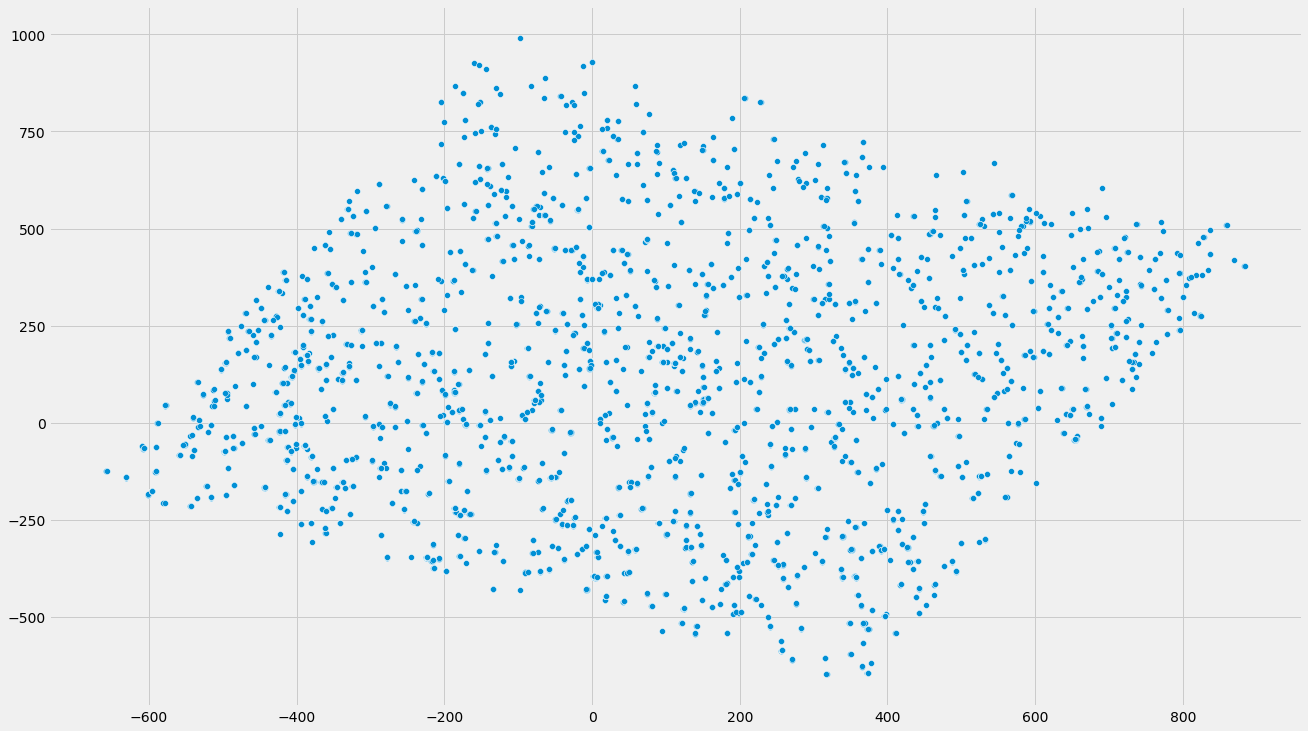

In [42]:
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
plt.figure(figsize=(20,12))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1], palette='cool')
plt.show()

****

****

# KMeans


In [61]:
# Apply k-means clustering to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)

# Assign each data point to a cluster
clusters = kmeans.predict(pca_data)
pc=principal_components
# Find the top 10 most similar products for each product
for i in range(len(data[:30])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    print(cluster_indices)
    distances = np.linalg.norm(pc[cluster_indices] - pc[i], axis=1)
    print(distances)
    closest_indices = np.argsort(distances)[1:11]
    print(cluster_indices[closest_indices])
#     closest_products = df.loc[cluster_indices[closest_indices]]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices],"\n\n\n\n")

[   0    4    6 ... 6325 6326 6328]
[  0.          47.62364539 178.54644705 ... 261.3697949  265.50681985
 641.99263478]
[  31 2071 3000    4   35  130  206  325  411  465]
Top 10 closest products for product 0 : [  31 2071 3000    4   35  130  206  325  411  465] 




[   1    2    3 ... 6322 6324 6327]
[  0.           1.84053098 502.65606777 ... 252.55843766 497.60664794
 542.53717117]
[   2   28  113  322  461  514  723 1045 4259 4212]
Top 10 closest products for product 1 : [   2   28  113  322  461  514  723 1045 4259 4212] 




[   1    2    3 ... 6322 6324 6327]
[  1.84053098   0.         501.06011774 ... 253.40645039 496.32134614
 542.41053541]
[   1   28  113  322  461  514  723 1045 4259 4212]
Top 10 closest products for product 2 : [   1   28  113  322  461  514  723 1045 4259 4212] 




[   1    2    3 ... 6322 6324 6327]
[502.65606777 501.06011774   0.         ... 552.31488132 137.64098971
 493.03294497]
[ 349  547  863 1146 1316 4165 4822 6137 6139   12]
Top 10 closest pr

****

# DBSCAN Clustering

In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_data)

# Find the top 10 most similar products for each product
for i in range(len(data[:20])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    distances = np.linalg.norm(pc[cluster_indices] - pc[i], axis=1)
    closest_indices = np.argsort(distances)[1:11]
#     closest_products = df.loc[cluster_indices[closest_indices]]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices])


Top 10 closest products for product 0 : [  31 2071 3000    4   23   30   48 3716 5701 5698]
Top 10 closest products for product 1 : [   2   32 4412   59   15 1801 1788 4925   45   91]
Top 10 closest products for product 2 : [   1   32 4412   15 1801 4925   59 1788   45   91]
Top 10 closest products for product 3 : [ 349  547  863 1146 1316]
Top 10 closest products for product 4 : [  23   30   48 3716 5701 5698    0   31 2071 3000]
Top 10 closest products for product 5 : [  26 3854 5450   16 1091 4930   24 5792   46 5706]
Top 10 closest products for product 6 : [   7   14  174 1852 2208 4919   11 1240 1357 5720]
Top 10 closest products for product 7 : [   6   14  174 1852 2208 4919   11 1240 1357 5720]
Top 10 closest products for product 8 : [  56  280  490  875 1152 1216 1319 1609 1681 1751]
Top 10 closest products for product 9 : [  57  183  281  432  491  555  796  876 1153 1217]
Top 10 closest products for product 10 : [4377 5587 6274   13   63  265  361   29  755  724]
Top 10 close

****

# AgglomerativeClustering

In [76]:
from sklearn.cluster import AgglomerativeClustering
# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(pca_data)

# Find the top 10 most similar products for each product
for i in range(len(df[:20])):
    cluster_idx = agg_clustering.labels_[i]
    similar_products = np.where(agg_clustering.labels_ == cluster_idx)[0]
    top_10_similar_products = similar_products[:10]
    print("Product", i, "is most similar to:", top_10_similar_products)


Product 0 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 1 is most similar to: [ 1  2  5 15 16 18 22 24 26 27]
Product 2 is most similar to: [ 1  2  5 15 16 18 22 24 26 27]
Product 3 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 4 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 5 is most similar to: [ 1  2  5 15 16 18 22 24 26 27]
Product 6 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 7 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 8 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 9 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 10 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 11 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 12 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 13 is most similar to: [ 3  8  9 10 12 13 19 20 21 25]
Product 14 is most similar to: [ 0  4  6  7 11 14 17 23 30 31]
Product 15 is most similar to: [ 1  2  5 15 16 18 22 24 26 27]
Pr

****

****

# DBSCAN with cosine_similarity

In [89]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity



dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_data)

for i in range(len(data[:20])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    p1 = np.array(pc[cluster_indices]).reshape(-1, pc.shape[1])
    p2 = np.array(pc[i]).reshape(1, -1)
    similarities = cosine_similarity(p1, p2)
    closest_indices = np.argsort(similarities.flatten())[-10:]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices])



Top 10 closest products for product 0 : [6226   73   94 3130 3767 4026 3000 2071   31    0]
Top 10 closest products for product 1 : [5722 3231 2879  125  131 2360    2  398 3985    1]
Top 10 closest products for product 2 : [2879  324 2360  398    1 5722 3985  125  131    2]
Top 10 closest products for product 3 : [1316 1146  863  547  349    3]
Top 10 closest products for product 4 : [5521 5056 4417   30  204  757 3296 4737 5400    4]
Top 10 closest products for product 5 : [2639 3225 5327 6012   72   46 5483 6024 5942    5]
Top 10 closest products for product 6 : [5911 6043  350 5041 5518 4005 4405 5579    7    6]
Top 10 closest products for product 7 : [5911 6043  350 5041 5518    6 4005 4405 5579    7]
Top 10 closest products for product 8 : [1681 1609 1319 1216 1152  875  490  280   56    8]
Top 10 closest products for product 9 : [1153  876  796  555  491  432  281  183   57    9]
Top 10 closest products for product 10 : [4999  815  724  755   29 5983 6274 5587 4377   10]
Top 10 